## **Assignment 1: Information Retrieval In High Dimensional Data**

### Group 7: 
* Verma, Shivendu (03692438)
* Ben Chaabene, Siwar (03687915)
* Mahajan, Shalvi (03708741)
* Najib, Amna (03689277)
* Sharma, Akshat (03708955)

<font color='RED'> **Curse of Dimensionality 
Task 1: [2 Points]**

TODO: Add Question for Task 1 


In [1]:
# Answer: Task1
# TODO: Add Answer for Task 1

<font color='RED'> **Task 2: [10 Points]**

Provide the PYTHON code to the following tasks (the code needs to be commented properly):

* Sample 100 uniformly distributed random vectors from the box $[-1,1]^d$ for d=2



In [2]:
import numpy as np
import pandas as pd
from decimal import *
import statistics
from matplotlib import pyplot as plt
import timeit

#Function to sample (no_vec,dim) dimensional uniformly distributed random vectors between [-1,1]
def generate_rv(no_vec, dim): 
    rv = np.random.uniform(-1, 1, (no_vec,dim))
    return rv

#Mean Minimum angle to other vectors for 100 vectors
dist=generate_rv(100,2)
print("100 uniformly distributed random vectors:")
print(dist)

100 uniformly distributed random vectors:
[[-0.06971302  0.13133017]
 [ 0.64713025 -0.16409291]
 [ 0.43900646 -0.78895346]
 [-0.17159051  0.77990679]
 [-0.99906441 -0.01821633]
 [-0.95923275  0.61621158]
 [ 0.24470129  0.02614271]
 [-0.75209462  0.35326244]
 [ 0.76962764 -0.9471209 ]
 [ 0.7211867   0.01367141]
 [-0.8886856  -0.89467015]
 [-0.10398226 -0.82012708]
 [ 0.86484066  0.32991388]
 [-0.57684974  0.83989343]
 [-0.52582053  0.37611154]
 [ 0.50466665  0.71564939]
 [-0.82666635 -0.43747929]
 [ 0.94830878  0.83159537]
 [ 0.37776001  0.87628871]
 [-0.5267882  -0.36526441]
 [-0.74405449 -0.5898477 ]
 [-0.29219969  0.33508303]
 [ 0.74452436  0.14601904]
 [ 0.9752091   0.53170654]
 [ 0.33353369  0.25615258]
 [ 0.74353181 -0.15708582]
 [ 0.37185538  0.76885845]
 [ 0.24612533 -0.81707829]
 [-0.53628264 -0.90234315]
 [ 0.32292899 -0.96240896]
 [ 0.52874148  0.59207149]
 [ 0.5321894  -0.14266849]
 [-0.84513663 -0.23688465]
 [-0.10998966 -0.52032042]
 [-0.09098417  0.58930172]
 [-0.94915444

<font color='RED'>

* For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors x, y the cosine of the angle between the two vectors is defined as
$$
\begin{equation}
\cos(\angle (x,y))=\frac{\langle x,y\rangle}{ \| x \| \| y\|}
\end{equation}
$$

In [3]:
#Function to caclucate angles between vectors
def cos_sim(v1, v2):
    cos=(float(np.dot(v1,v2)))/(np.linalg.norm(v1)*np.linalg.norm(v2))
    angle_rad=np.arccos(cos)
    angle_deg=np.rad2deg(angle_rad)
    return angle_deg

#Function for Mean of minimum angles
def mean_min_angle(rand_distribution):
    res=np.zeros((len(rand_distribution)),dtype=float)
    mat=np.zeros((len(rand_distribution),len(rand_distribution)),dtype=float)
    mn=float(0)
  
    for i in range(0,len(rand_distribution)):
        for j in range(0,len(rand_distribution)):
            #Calculate angles with all vectors
            if(i!=j):
                mat[i,j]=cos_sim(rand_distribution[i],rand_distribution[j])
            else:
                mat[i,j]=0
        #Compile minimum angles from all vectors
        res[i]=sorted(mat[i])[1]
    #Mean of minimum angles
    return statistics.mean(res[:])

print("Mean Minimum angles of 100 uniformly distributed random vectors: ", mean_min_angle(dist))


Mean Minimum angles of 100 uniformly distributed random vectors:  1.7991970774197645


<font color='RED'>

* Repeat the above for dimensions d = 1,....,1000 and use the results to plot the average minimum angle against the dimension.* *


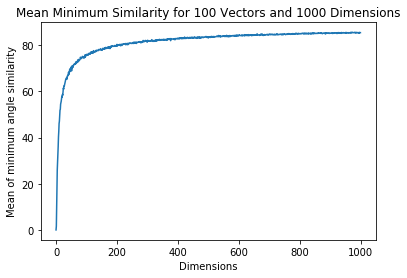

In [4]:
#Function to Plot For min angles
def plotMinAngle(no_vec, dim):
    plt.title('Mean Minimum Similarity for %d Vectors and %d Dimensions' % (no_vec,dim))
    plt.xlabel('Dimensions')
    plt.ylabel('Mean of minimum angle similarity');
    plot_arr=np.empty((1),dtype=float)

    #code_to_test="""
    for i in range(1,dim+1):
        if(i==1):
            plot_arr=mean_min_angle(generate_rv(no_vec,i))
        else:
            plot_arr=np.append(plot_arr,mean_min_angle(generate_rv(no_vec,i)))

    plt.plot(plot_arr)
    plt.show()
    
plotMinAngle(100,1000)

<font color='RED'>

* Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a d-dimensional space?


The curve of 100 Random variables plotted in dimensions form 1 to 1000 shows that when the dimension 'd' increases, the average minimum angle tends to cos 90° or cosine similarity of 0. Which means that as in high dimensional space, correlation between the same vectors decreases.


<font color='RED'>

* Does the result change if the sample size increases?

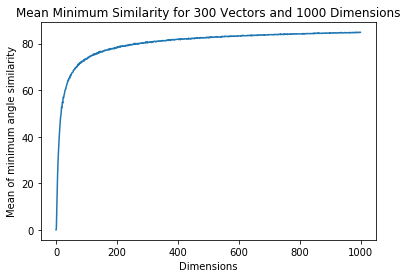

In [5]:
#Increasing number of variables
plotMinAngle(300,1000)


No, the result does not change as the number of samples increases, and the above result of decreasing cosine similarity with increasing dimensions still holds true.


<font color='RED'>
    
**Statistical Decision Making
Task 3: [10 Points]**
<!-- <img src="Task3.jpg" style="width: 220px;"> -->

Figure 1: Task 3:

| x / y | 1 | 2 | 3 |
| --- | --- | --- | --- |
| 1 | 0.02 | 0.26 | 0.13 |
| 2 | 0.4 | 0.14 | 0.05 |

Answer the following questions. All answers must be justified.


<font color='RED'>

* The numbers in Figure 1 show the probability of the respective event to happen (e.g. the probability for the event $X=1$ and $Y=1$ is $0.02$). Is this table a probability table? If so, why?

The table will be a probability table only if the sum of the individual probabilities of all events is 1.

$$
\because\,\; \sum_Y \sum_X p_{X, Y}(x, y) = 0.4+0.14+0.05+0.02+0.26+0.13 = 1
$$
Also,
$$
\because\,\; p_{X, Y}(x, y) \geq 0 \quad \forall\; (x, y) \in \{\mathbf{X} \times \mathbf{Y}\}
$$
Hence, Figure 1 is a probability table.

<font color='RED'>

* Based on Figure 1 give the conditional expectation $\mathbb{E}_{Y \mid X=2}[Y]$ and the probability
of the event $X=1$ under the condition that $Y=3$.

Conditional expectation $\mathbb{E}_{Y \mid X=2}[Y]$:
$$
\begin{align*}
& \because \,\; \mathbb{E}_{Y \mid X=2}[Y] = \sum_Y Y\;P(Y \mid X=2) \\
& \Rightarrow \mathbb{E}_{Y \mid X=2}[Y] = \sum_Y Y\;\frac{P(Y \cap X=2)}{P(X=2)} \\
& \Rightarrow \mathbb{E}_{Y \mid X=2}[Y] = \frac{1}{P(X=2)}\; \sum_Y Y\; P(Y \cap X=2) \\
& \Rightarrow \mathbb{E}_{Y \mid X=2}[Y] = \frac{1}{\sum_Y P(X=2, Y)}\sum_Y Y\;P(Y \cap X=2) \\
& \Rightarrow \mathbb{E}_{Y \mid X=2}[Y] = \frac{1}{0.4+0.14+0.05}(1\times 0.4 + 2\times 0.14 + 3\times 0.05) \\
& \therefore \,\; \mathbb{E}_{Y \mid X=2}[Y] = \frac{0.83}{0.59} \approx 1.4068
\end{align*}
$$

Conditional probability $P(X=1 \mid Y=3)$:
$$
\begin{align*}
& \because \,\; P(X=1 \mid Y=3) = \frac{P(X=1 \cap Y=3)}{P(Y=3)} \\
& \Rightarrow P(X=1 \mid Y=3) = \frac{P(X=1 \cap Y=3)}{\sum_X P(X, Y=3)} \\
& \Rightarrow P(X=1 \mid Y=3) = \frac{0.13}{0.13 + 0.05} \\
& \therefore \,\; P(X=1 \mid Y=3) = \frac{0.13}{0.18} \approx 0.722
\end{align*}
$$


<font color='RED'>

* Is the function p(x, y) given by
$$
p(x, y) = \begin{cases}
1 & \quad \text{for } 0\leq x\leq 1\text{, } 0\leq y\leq \frac{1}{2} \\
0 & \quad \text{otherwise} \end{cases}
$$
a joint density function for two random variables?

For the function to be joint density function for two random variables,
$$
\int_y \int_x p(x, y) =1
$$
Let's check this for $p(x, y)$ 
$$
\because \int_y \int_x p(x, y)\; \mathrm{d}x \mathrm{d}y = \int_0^{1/2} \int_0^1 1\; \mathrm{d}x \mathrm{d}y = \int_0^{1/2} x\mid_0^1\; \mathrm{d}y = \int_0^{1/2} 1\; \mathrm{d}y = y\mid_0^{1/2} = \frac{1}{2} \neq 1
$$
Therefore, $p(x, y)$ is not a density function.

<font color='RED'>

* For two random variables X and Y the joint density function is given by
$$
p(x, y) = \begin{cases}
2\mathit{e}^{-(x+y)} & \quad \text{for } 0\leq x\leq y\text{, } 0\leq y \\
0 & \quad \text{otherwise.} \end{cases}
$$
What are the marginal density functions for X and Y respectively?

Marginal density function for $\mathbf{X}$ :
$$
\begin{align*}
& \because \,\; p(x) = \int_x^\infty p(x, y)\; \mathrm{d}y\\
& \Rightarrow p(x) = \lim_{u\to\infty} \int_x^u p(x, y)\; \mathrm{d}y\\
& \Rightarrow p(x) = \lim_{u\to\infty} \int_x^u 2e^{-(x+y)}\; \mathrm{d}y\\
& \Rightarrow p(x) = 2e^{-x} \lim_{u\to\infty} \int_x^u e^{-y}\; \mathrm{d}y\\
& \Rightarrow p(x) = 2e^{-x} \lim_{u\to\infty} \big[-e^{-y}\big]_{y=x}^{y=u}\\
& \Rightarrow p(x) = 2e^{-x} \lim_{u\to\infty} \big[-e^{-u}+e^{-x}\big]\\
& \Rightarrow p(x) = 2e^{-x} \big[0+e^{-x}\big]\\
& \therefore \,\; p(x) = 2e^{-2x}\\
\end{align*}
$$
Using the same for $\mathbf{Y}$ :
$$
\begin{align*}
& \because \,\; p(y) = \int_0^y p(x, y)\; \mathrm{d}x\\
& \Rightarrow p(y) = \int_0^y 2e^{-(x+y)}\; \mathrm{d}x\\
& \Rightarrow p(y) = 2e^{-y} \int_0^y e^{-x}\; \mathrm{d}x\\
& \Rightarrow p(y) = 2e^{-y} \big[ -e^{-x} \big]_{x=0}^{x=y}\\
& \Rightarrow p(y) = 2e^{-y} \big[ -e^{-y} + e^0 \big]\\
& \therefore \,\; p(y) = 2e^{-y} \big( 1 - e^{-y} \big)\\
\end{align*}
$$

<font color='RED'>

* Let the joint density function of two random variables X and Y be given by
$$
p(x, y) = \begin{cases}
\frac{1}{15}(2x+4y) & \quad \text{for } 0\leq x\leq 3\text{, } 0\leq y\leq 1 \\
0 & \quad \text{otherwise.} \end{cases}
$$
Determine the probability for $X\leq 2$ under the condition that $Y = \frac{1}{2}$.

$$
\begin{align*}
& \because \,\; p(y) = \int_x p(x, y)\; \mathrm{d}x\\
& \Rightarrow p(y) = \int_0^3 p(x, y)\; \mathrm{d}x\\
& \Rightarrow p(y) = \int_0^3 \frac{1}{15}(2x+4y)\; \mathrm{d}x\\
& \Rightarrow p(y) = \frac{1}{15}\; (x^2+4yx)\mid_{x=0}^3\\
& \therefore \,\; p(y) = \frac{1}{5}\; (4y+3)\\
\end{align*}
$$
Therefore,
$$
\begin{align*}
& \because \,\; P(X\leq 2\mid Y=\frac{1}{2}) = \int_0^2 \frac{p(x, y)}{p(y)}\mid_{y=\frac{1}{2}}\; \mathrm{d}x\\
& \Rightarrow P(X\leq 2\mid Y=\frac{1}{2}) = \int_0^2 \frac{2x+4y}{12y+9}\mid_{y=\frac{1}{2}}\; \mathrm{d}x\\
& \Rightarrow P(X\leq 2\mid Y=\frac{1}{2}) = \int_0^2 \frac{2x+2}{15}\; \mathrm{d}x\\
& \Rightarrow P(X\leq 2\mid Y=\frac{1}{2}) = \frac{1}{15}\; (x^2+2x)\mid_0^2\\
& \therefore \,\; P(X\leq 2\mid Y=\frac{1}{2}) = \frac{8}{15} \approx 0.533
\end{align*}
$$

<font color='RED'>
    
**Task 4: [3 Points]**

TODO: Add Question for Task 4 

In [ ]:
Answer: Task4
# TODO: Add Answer for Task 4